<a href="https://colab.research.google.com/github/saavedruky/IA_SISTEMAS_2024/blob/main/Practica2_Infrared_Thermography_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     0    1    2
0  5.1  3.5  1.4
1  4.9  3.0  1.4
2  4.7  3.2  1.3
3  4.6  3.1  1.5
4  5.0  3.6  1.4
0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: 3, dtype: float64


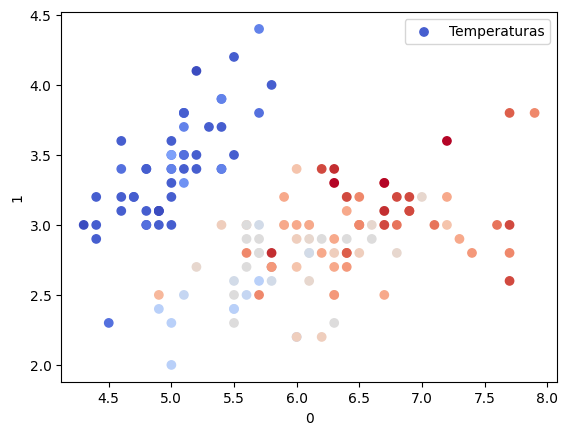

<ipython-input-9-4c1a94f13831>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w[0] += update  # Actualización del sesgo (w[0])
<ipython-input-9-4c1a94f13831>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)
<ipython-input-9-4c1a94f13831>:21: RuntimeWarning: invalid value encountered in add
  self.w[1:] += update * xi  # Actualización de los pesos
<ipython-input-9-4c1a94f13831>:22: RuntimeWarning: invalid value encountered in add
  self.w[0] += update  # Actualización del sesgo (w[0])


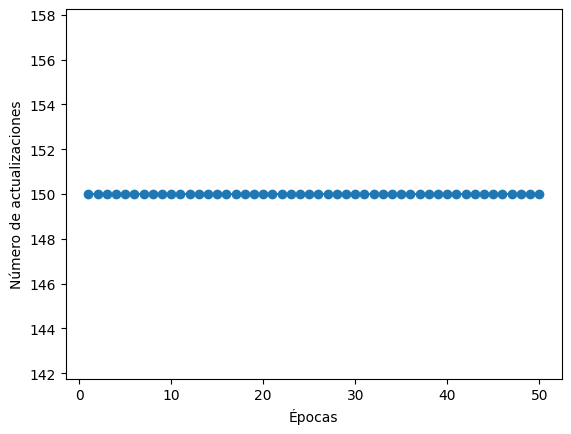

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clase Perceptrón
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Inicialización de los pesos
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.net_input(xi))
                self.w[1:] += update * xi  # Actualización de los pesos
                self.w[0] += update  # Actualización del sesgo (w[0])
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        # Asegurarse de que X sea un arreglo numpy
        X = np.asarray(X)

        # Si X es una fila única, asegurar que sea 1D
        if X.ndim == 1:
            X = X.reshape(1, -1)

        # Convert X to numeric type
        X = X.astype(np.float64)

        # Calcula el producto punto de las entradas con los pesos (sin el término de sesgo)
        # Y añade el término de sesgo por separado
        return np.dot(X, self.w[1:]) + self.w[0]

    def predict(self, X):
        # Predecir basado en el resultado de la entrada
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Cargar el conjunto de datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)


# Variables de características (X) y objetivo (y)
X = df.iloc[:, :-2]  # Todas las columnas excepto las dos últimas
y = df.iloc[:, -2]   # Usamos la penúltima columna como el objetivo (Y1)

# Visualizar la estructura de las características y el objetivo
print(X.head())
print(y.head())

# Visualización de dos variables de interés
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='coolwarm', marker='o', label='Temperaturas')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend(loc='upper right')
plt.show()

# Convertir el objetivo a una clasificación binaria (umbral en la media)
y = np.where(y > y.mean(), 1, -1)

# Convert X to a NumPy array with numeric type before fitting the model
X = X.to_numpy().astype(np.float64)

# Ajustar el Perceptrón
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar los errores durante las épocas
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.show()